# WordCloud

In [ ]:
!pip install konlpy
import re
import konlpy
import pandas as pd

     |████████████████████████████████| 19.4 MB 484 kB/s 
     |████████████████████████████████| 448 kB 46.5 MB/s 


In [ ]:
#'과제_뉴스 기사' 텍스트 불러오고 string으로 읽기
with open('/content/과제_뉴스 기사.txt', encoding='utf-8') as f:  #본인 디렉토리에 맞게 설정해주세요!
    text = f.readlines()
    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
text_strip = [i.strip() for i in text if i != '\n']
text_join = ' '.join(text_strip)
#빈 줄과 양 끝단의 공백 제거
p = re.compile(r'\bclass\b')
filtered_content = re.sub(r'[^\d\s\w]', ' ', text_join)
#원하는 형태소 분석기로 pos 태깅, morphs, 그리고 명사만 모아놓은 변수 만들어보기
okt = konlpy.tag.Okt()
okt_pos = okt.pos(filtered_content)

komoran = konlpy.tag.Komoran()
komoran.morphs(filtered_content)

komoran_nouns = komoran.nouns(filtered_content)

#이메일, 날짜 등 불용어 제거
from nltk.corpus import stopwords
stop_words = ['이오', '에다', '하오', '마오'] #한국어로 할 때는 직접 설정.
unique_Noun_words = set(komoran_nouns)
for word in unique_Noun_words:
    if word in stop_words or len(word) == 1:  #한 글자짜리 단어는 알아보기 어려워서 제거.
        while word in komoran_nouns:
            komoran_nouns.remove(word)

#Counter 모듈로 빈도 분석
from collections import Counter
c = Counter(komoran_nouns)
c

Counter({'6월': 3,
         '가계': 4,
         '가중': 1,
         '강화': 1,
         '거래': 2,
         '경신': 1,
         '관계자': 1,
         '관련': 1,
         '규모': 1,
         '규제': 1,
         '금고': 1,
         '금리': 17,
         '금융': 1,
         '금지': 1,
         '기관': 1,
         '기록': 2,
         '기자': 1,
         '기준': 2,
         '기후': 1,
         '늦기 전에': 1,
         '담보': 1,
         '대기': 1,
         '대로': 1,
         '대비': 3,
         '대책': 1,
         '대출': 15,
         '대출금': 1,
         '때문': 2,
         '리도': 1,
         '만원': 1,
         '매매': 1,
         '무단': 1,
         '발표': 1,
         '배포': 1,
         '보관': 1,
         '부동산': 2,
         '비율': 2,
         '사람': 2,
         '사상': 4,
         '사자': 1,
         '사태': 1,
         '상품': 1,
         '설명': 1,
         '속도': 1,
         '수단': 1,
         '수요': 1,
         '수준': 2,
         '시대': 2,
         '시장': 1,
         '신용': 7,
         '신용거래': 1,
         '신용등급': 1,
         '안전': 1,
         '얘기': 2,
         '역대': 5

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

## 한글폰트 다운로드
나눔 폰트를 다운 받고 font_path를 저장해주세요. 이후 plt.rc를 활용해 폰트를 지정해주세요.

In [ ]:
import matplotlib.font_manager as fm
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f] 
print(f"nanum_font number: {len(nanum_font)}") 

sys_font number: 17
['/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/lib

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [ ]:
nanum_font

In [ ]:
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  
current_font()

Python 3.7.12
설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 10.0


In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic Eco


In [ ]:
font_path = path

## 워드클라우드 시각화
단어별 빈도분석이 저장된 c 라는 객체를 WordCloud 시각화해주세요.

Hint: 
<br>wordcloud = WordCloud(~~~)
<br>wordcloud.generate_from_frequencies(c)
<br>wordcloud.to_image()
<br>잘 모르시겠으면 Notion에 업로드된 텍스트 마이닝의 워드클라우드 강의를 참고해주세요.

In [ ]:
!pip install wordcloud

In [ ]:
komoran_nouns

['대출금',
 '리도',
 '사상',
 '최저',
 '은행',
 '예금',
 '사상',
 '금리',
 '시대',
 '은행',
 '예금',
 '연간',
 '만원',
 '얘기',
 '은행',
 '적금',
 '수단',
 '안전',
 '보관',
 '금고',
 '시대',
 '대출',
 '금리',
 '역대',
 '최저',
 '기록',
 '주식',
 '부동산',
 '한국은행',
 '발표',
 '6월',
 '금융',
 '기관',
 '가중',
 '평균',
 '금리',
 '지난달',
 '은행',
 '예금',
 '금리',
 '전월',
 '대비',
 '포인트',
 '역대',
 '처음',
 '금리',
 '은행',
 '정기예금',
 '상품',
 '금리',
 '수준',
 '코로나',
 '사태',
 '이후',
 '한은',
 '기준',
 '금리',
 '사상',
 '최저',
 '예금',
 '금리',
 '대출',
 '금리',
 '역대',
 '최저',
 '수준',
 '은행',
 '대출',
 '금리',
 '평균',
 '역대',
 '최저',
 '집계',
 '가계',
 '대출',
 '금리',
 '신용',
 '대출',
 '주택',
 '담보',
 '대출',
 '신용',
 '대출',
 '금리',
 '전월',
 '대비',
 '포인트',
 '신용',
 '대출',
 '금리',
 '대로',
 '이번',
 '처음',
 '신용',
 '대출',
 '금리',
 '정부',
 '규제',
 '강화',
 '신용',
 '대출',
 '사람',
 '때문',
 '관계자',
 '부동산',
 '대책',
 '전후',
 '주택',
 '매매',
 '전세',
 '거래',
 '증가',
 '주택',
 '거래',
 '관련',
 '신용',
 '대출',
 '사람',
 '우량',
 '차주',
 '비율',
 '신용등급',
 '우량',
 '차주',
 '비율',
 '전체',
 '신용',
 '대출',
 '금리',
 '현상',
 '설명',
 '시장',
 '금리',
 '가계',
 '대출',
 '속도',
 '한은',
 '6월',
 '은행',
 '가계',
 '대출',

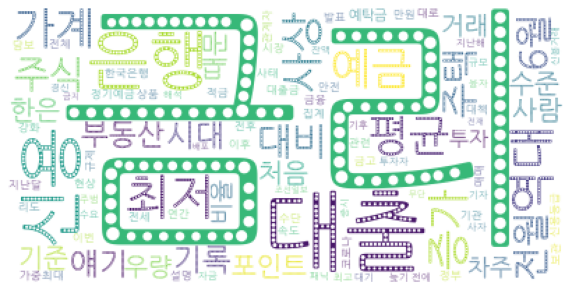

In [ ]:
word_cloud = WordCloud(font_path=font_path, background_color='white',max_font_size=400).generate_from_frequencies(c)

# 사이즈 설정 및 화면에 출력
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

# Bike Sharing Demand

출처: https://www.kaggle.com/c/bike-sharing-demand/data?select=train.csv

## Load Dataset

첨부된 train 데이터를 불러와주세요.

In [ ]:
train = pd.read_csv('/content/train.csv')

## 전처리
datetime의 data를 연/월/일/시간/분/초/요일로 쪼개서 새로운 컬럼에 담아주세요.
전처리 하고 나면 연 컬럼, 월 컬럼부터 초 컬럼, 요일 컬럼까지 총 7개의 컬럼이 추가 되어야합니다.
<br>Hint:파이썬에 내장된 .dt 함수를 활용해주세요.

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
train['datetime'] = pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [ ]:
train['year']=train['datetime'].dt.year

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011


In [ ]:
train['month']= train['datetime'].dt.month
train['date'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second
train['weekday']=train['datetime'].dt.weekday

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,date,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


datetime의 요일 컬럼을 사람이 알아보기 쉽게 Monday~Sunday로 바꿔주세요.
dt 함수를 사용하셨다면 다음과 같이 바꾸시면 됩니다.
<br> 0 = Monday
<br> 1 = Tuesday
<br> 2 = Wednesday
<br> 3 = Thursday
<br> 4 = Friday
<br> 5 = Saturday
<br> 6 = Sunday

In [ ]:
train['weekday'].replace({0:'Monday',1:'Tuseday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'},inplace=True)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,date,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,Saturday


## 시각화



### 1)
연도별 자전거 대여량과 월별 자전거 대여량을 시각화 해주세요.

이후 각 시각화한 plot에서 각자 인사이트를 도출해주세요.

<br> 힌트: barchart, 계절

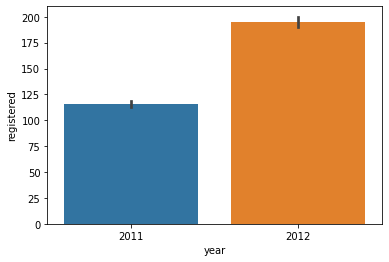

In [ ]:
import seaborn as sns
sns.barplot(data = train, x = 'year', y = 'registered')

2012년이 2011년보다 더 대여량이 많은 것을 볼 수 있음 

각 연도마다의 월별 자전거 대여량을 비교해봐야 할 필요가 있음

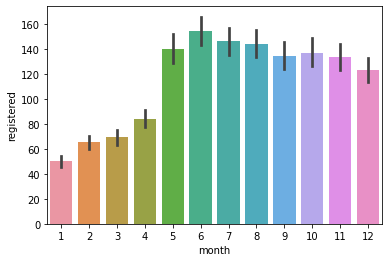

In [ ]:
sns.barplot(data = train[ train['year']==2011 ], x = 'month', y='registered')

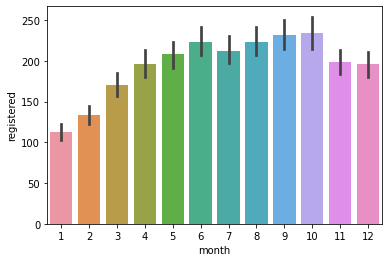

In [ ]:
sns.barplot(data = train[ train['year']==2012 ], x = 'month', y='registered')

여름철 대여량의 차이가 있었다면 장마나 태풍의 영향을 생각해 볼 수 있었겠지만, 

월별 분포는 동일하나 전체량에 차이가 있으므로 2011년의 자전거 대여 서비스나 탑승환경적 정비가 되지 않는 등의 문제를 생각해 볼 수 있음 

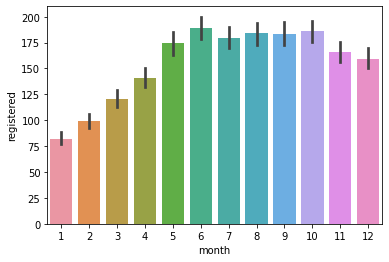

In [ ]:
sns.barplot(data = train, x = 'month', y = 'registered')

기온이 올라가는 5월부터 따듯한 날씨가 유지되는 10월 까지는 자전거 대여량이 더 많음. 

날씨가 추워지는 시즌에는 자전거 대여량이 줄어듦. (야외에서 자전거를 타기 힘든 날씨)

###2)
연컬럼과 월컬럼을 합쳐주세요. 이후 2011년 1월부터 2012년 12월까지 월별 자전거 대여량을 시각화 해주세요. 

이전에 시각화한 월별 자전거 대여량 시각화 차트에서, 어째서 1월과 12월의 자전거 대여량의 차이가 크게 났는지 설명해주세요.

In [ ]:
train.head()

In [ ]:
train['year_month'] = train['year'].map(str)+'.'+train['month'].map(str)

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,date,hour,minute,second,weekday,year_month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,Saturday,2011.1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,Saturday,2011.1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,Saturday,2011.1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,Saturday,2011.1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,Saturday,2011.1


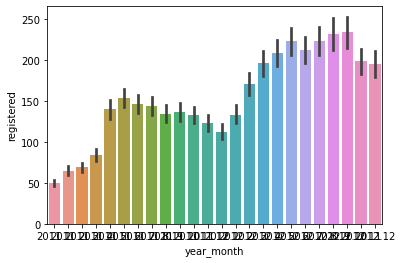

In [ ]:
sns.barplot(data=train, x='year_month', y='registered')

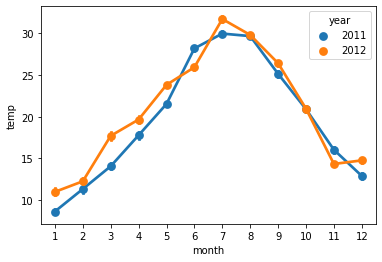

In [ ]:
sns.pointplot(data=train, x='month',y='temp',hue='year')

수치로만 보면, 2011년 1월의 대여량이 현저히 낮은 이유로 전체 기간으로 봤을 때, 12월의 대여량이 1월보다 많다고 할 수 있다. 

그 이유를 정확하게는 알 수 없지만, 날씨를 plot해본 결과 1월의 날씨가 12월보다 매우 낮아 자전거를 타기에 적합하지 않았을 것이고 이로인해 대여량이 감소했을 것으로 예측해 볼 수 있다. 

###3)
아래의 정보가 나타나게 시각화 해주세요.
<br>1) 시간별 자전거 대여량
<br>2) 근무일/휴일에 따른 시간별 자전거 대여량
<br>3) 요일에 따른 시간별 자전거 대여량

이 플랏에서 인사이트를 도출해주세요.

Hint: pointplot, hue

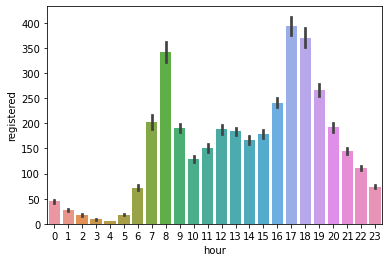

In [ ]:
sns.barplot(data=train, x='hour',y='registered')

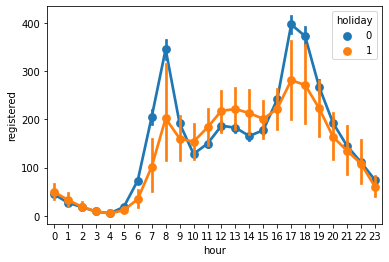

In [ ]:
sns.pointplot(data=train,x='hour',y='registered',hue='holiday')

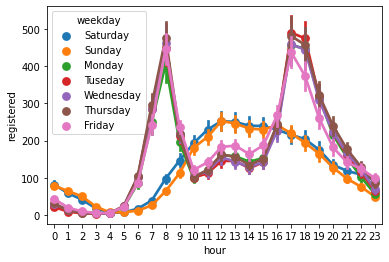

In [ ]:
sns.pointplot(data=train,x='hour',y='registered',hue='weekday')

주말에는 낮시간대, 평일에는 대체로 아침과 저녁이후의 대여량이 지배적인 것을 보아, 대체로 평일 낮에 일과가 있는 사람들이 일과 이전과 후에 주로 이용하는 것을 알 수 있다. 또한 휴일인 경우에는 밤과 새벽시간을 제외하고는 대체로 변동폭이 크지 않은 것 또한 알 수 있다. 

# mpg


## Load Dataset
seaborn을 이용해 'mpg'데이터셋을 불러와주세요.

In [ ]:
mpg=sns.load_dataset('mpg')

## 시각화

model_year과 mpg 데이터 값을 산점도로 보여주고, 그 간의 선형관계를 선으로 보여주세요.
<br> Hint: regplot

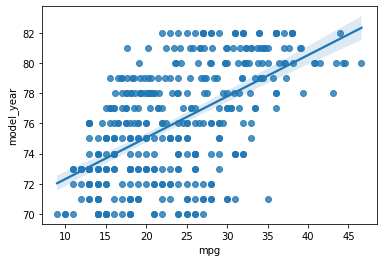

In [ ]:
sns.regplot(data=mpg,x='mpg',y='model_year')

너무너무 고생 많으셨습니다!! 시각화 세션 화이팅하세요ㅎㅎㅎ
